# sleep health and lifestyle dataset
## Shaked gueta, Bar isachr and Shiraz levy python project

## Project Goal

The goal of this project is to analyze the relationship between lifestyle and heart health with sleep quality and duration and to identify factors that may influence the occurrence of sleep disorders such as insomnia and sleep apnea.
Through this analysis, we aim to understand which lifestyle and health-related variables are associated with healthy or poor sleep patterns and how this data can be used to promote health and improve quality of life.

## Analysis Topic

Sleep health and lifestyle – understanding the relationships between variables such as physical activity, mental stress, BMI, daily steps, heart rate and blood pressure – and their connection to sleep quality, sleep duration, and sleep disorders.

## Research Questions

•	Is there a relationship between sleep duration and sleep quality?

•	Is there a relationship between stress levels and sleep quality?

•	Do people with higher physical activity levels suffer less from sleep disorders?

•	Is there a relationship between BMI category and type of sleep disorder (if any)?

•	Do heart rate and blood pressure affect sleep quality?

•	Are there differences between males and females in sleep quality or sleep disorder frequency?

## Methods

•	Using Pandas & NumPy for data manipulation.

•	Using Matplotlib & Seaborn for visualizing trends.

•	Performing statistical and categorical analysis on my listening habits.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sleep_health_and_lifestyle_dataset.csv')

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


###### מהפלט של df.describe() ניתן לראות כי לא נמצאו ערכים חריגים או חסרים בנתונים

In [6]:
#טיפול בערכים חסרים
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [7]:
#איחוד ערכים שונים ל- NORMAL
df['BMI Category'] = df['BMI Category'].replace({
    'NormalWeight': 'Normal',
    'Normal Weight': 'Normal'
})

_______________________________________________________________________________________________________________________________________________________

##### Average Sleep Quality by Stress Level

In [8]:
#ממוצע איכות שינה לפי רמות סטרס
df.groupby('Stress Level')['Quality of Sleep'].mean().sort_index()

Stress Level
3    8.971831
4    7.671429
5    7.895522
6    7.000000
7    6.000000
8    5.857143
Name: Quality of Sleep, dtype: float64

_______________________________________________________________________________________________________________________________________________________

##### Comparison of Sleep Duration by Gender

In [9]:
#השוואת משך שינה לפי מין
df.groupby('Gender')['Sleep Duration'].mean()

Gender
Female    7.229730
Male      7.036508
Name: Sleep Duration, dtype: float64

_______________________________________________________________________________________________________________________________________________________

##### Average Sleep Quality by Age Group

In [10]:
#ממוצע איכות שינה לפי קבוצות גיל
bins = [18, 30, 45, 60]
labels = ['צעיר', 'בוגר', 'מבוגר']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.groupby('Age Group', observed=False)['Quality of Sleep'].mean()

Age Group
צעיר     6.156250
בוגר     7.163793
מבוגר    7.963636
Name: Quality of Sleep, dtype: float64

_______________________________________________________________________________________________________________________________________________________

##### Average Stress Level by Occupation

In [11]:
#ממוצע רמת סטרס לפי עיסוק
df.groupby('Occupation')['Stress Level'].mean().sort_values(ascending=False)

Occupation
Sales Representative    8.000000
Salesperson             7.000000
Scientist               7.000000
Doctor                  6.732394
Software Engineer       6.000000
Nurse                   5.547945
Lawyer                  5.063830
Manager                 5.000000
Accountant              4.594595
Teacher                 4.525000
Engineer                3.888889
Name: Stress Level, dtype: float64

_______________________________________________________________________________________________________________________________________________________

##### Average Sleep Quality by BMI Category and Gender

In [12]:
#ניתוח מתקדם
#ממוצע איכות שינה לפי קטגוריות BMI ולפי מין
sleep_quality_bmi_gender = df.groupby(['BMI Category', 'Gender'])['Quality of Sleep'].mean().unstack()
print("Average Quality of Sleep by BMI Category and Gender:")
display(sleep_quality_bmi_gender)

Average Quality of Sleep by BMI Category and Gender:


Gender,Female,Male
BMI Category,,
Normal,8.282051,7.275362
Obese,7.000000,6.333333
Overweight,7.216981,6.095238


_______________________________________________________________________________________________________________________________________________________

##### Average Stress Level by Sleep Disorder

In [13]:
#ניתוח מתקדם
#ממוצע רמת סטרס לפי הפרעת שינה
stress_sleep_disorder = df.groupby('Sleep Disorder')['Stress Level'].mean()
print("Average Stress Level by Sleep Disorder:")
display(stress_sleep_disorder)

Average Stress Level by Sleep Disorder:


Sleep Disorder
Insomnia       5.870130
None           5.114155
Sleep Apnea    5.666667
Name: Stress Level, dtype: float64

________________________________________________________________________________________________________________________________________________________

#### Is there a relationship between sleep duration and sleep quality?

In [14]:
correlation = df['Sleep Duration'].corr(df['Quality of Sleep'])
print(f"Correlation between sleep duration and sleep quality: {correlation:.2f}")

Correlation between sleep duration and sleep quality: 0.88


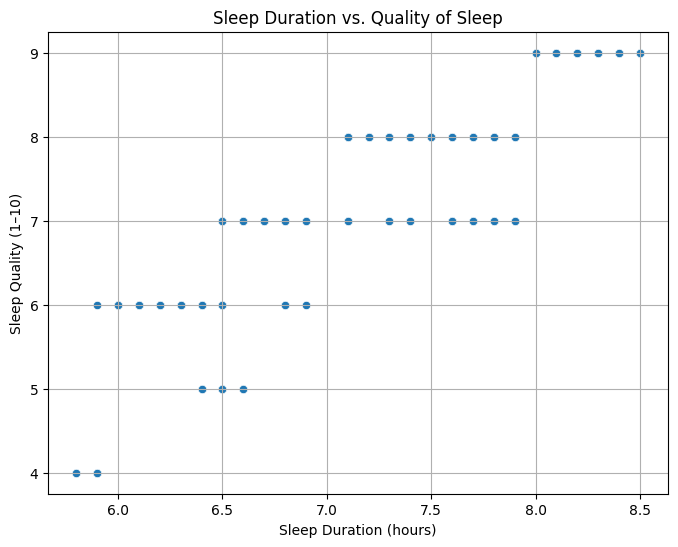

In [15]:
plt.figure(figsize=(8, 6))
sb.scatterplot(data=df, x='Sleep Duration', y='Quality of Sleep')
plt.title('Sleep Duration vs. Quality of Sleep')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Sleep Quality (1–10)')
plt.grid(True)
plt.show()

##### There is a strong positive correlation (r = 0.88) between sleep duration and sleep quality, indicating that longer sleep is generally associated with better sleep quality.

_______________________________________________________________________________________________________________________________________________________

#### Is there a relationship between stress levels and sleep quality?

In [16]:
# Group by stress level and calculate mean sleep quality
stress_sleep = df.groupby('Stress Level')['Quality of Sleep'].mean().reset_index()
display(stress_sleep)

,Stress Level,Quality of Sleep
0,3,8.971831
1,4,7.671429
2,5,7.895522
3,6,7.000000
4,7,6.000000
5,8,5.857143


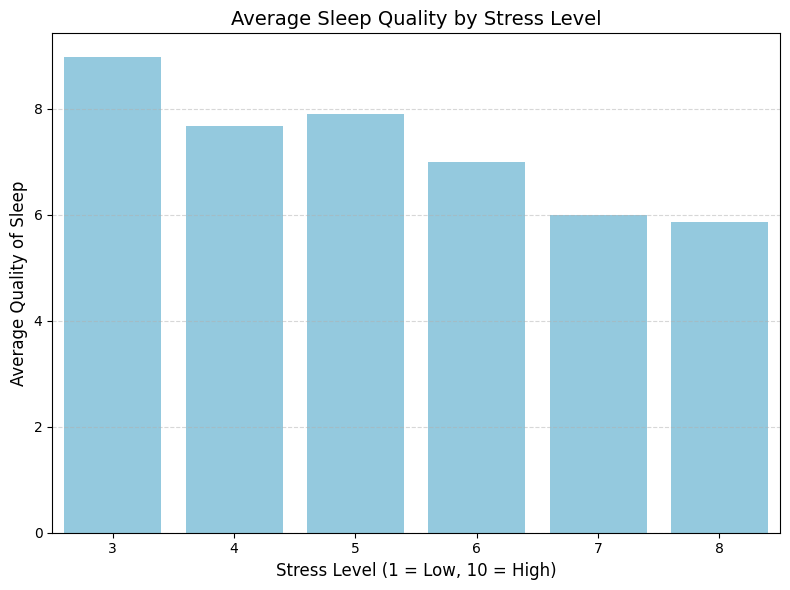

In [17]:
plt.figure(figsize=(8, 6))
sb.barplot(data=stress_sleep, x='Stress Level', y='Quality of Sleep', color='skyblue')

plt.title('Average Sleep Quality by Stress Level', fontsize=14)
plt.xlabel('Stress Level (1 = Low, 10 = High)', fontsize=12)
plt.ylabel('Average Quality of Sleep', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### There is a relationship between stress level and sleep quality: as stress level increases, sleep quality decreases.

_______________________________________________________________________________________________________________________________________________________

#### Do people with higher physical activity levels suffer less from sleep disorders?

In [18]:
activity_by_disorder = df.groupby('Sleep Disorder')['Physical Activity Level'].mean().round(2).fillna('None')
print(activity_by_disorder)

Sleep Disorder
Insomnia       46.82
None           57.95
Sleep Apnea    74.79
Name: Physical Activity Level, dtype: float64


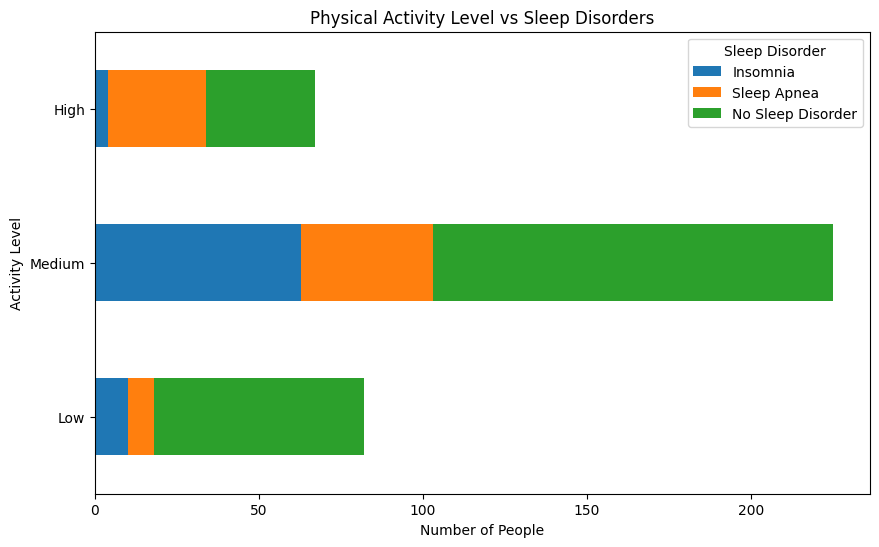

In [19]:
#יצירת קטגוריות של רמות פעילות גופנית(נמוכה, בינונית, גבוהה)
bins = [0, 45, 90, 1000]
labels = ['Low', 'Medium', 'High']
df['activity_level_category'] = pd.cut(df['Physical Activity Level'], bins=bins, labels=labels, right=False)

activity_sleep = df.groupby(['activity_level_category', 'Sleep Disorder'], observed=False).size().unstack(fill_value=0)

activity_sleep['No Sleep Disorder'] = activity_sleep['None']

activity_sleep[['Insomnia', 'Sleep Apnea', 'No Sleep Disorder']].plot(kind='barh', stacked=True, figsize=(10, 6))

plt.title('Physical Activity Level vs Sleep Disorders')
plt.xlabel('Number of People')
plt.ylabel('Activity Level')
plt.show()

##### The findings indicate that individuals with higher physical activity levels tend to experience fewer sleep disorders.

_______________________________________________________________________________________________________________________________________________________

#### Is there a relationship between BMI category and type of sleep disorder (if any)?

In [22]:
bmi_order = ['Normal', 'Overweight', 'Obese']
filtered_df = df[df['BMI Category'].isin(['Normal', 'Overweight', 'Obese'])]
bmi_vs_disorder = pd.crosstab(filtered_df['BMI Category'], filtered_df['Sleep Disorder'])

bmi_vs_disorder = bmi_vs_disorder.reindex(bmi_order)
print(bmi_vs_disorder)

Sleep Disorder  Insomnia  None  Sleep Apnea
BMI Category                               
Normal                 9   200            7
Overweight            64    19           65
Obese                  4     0            6


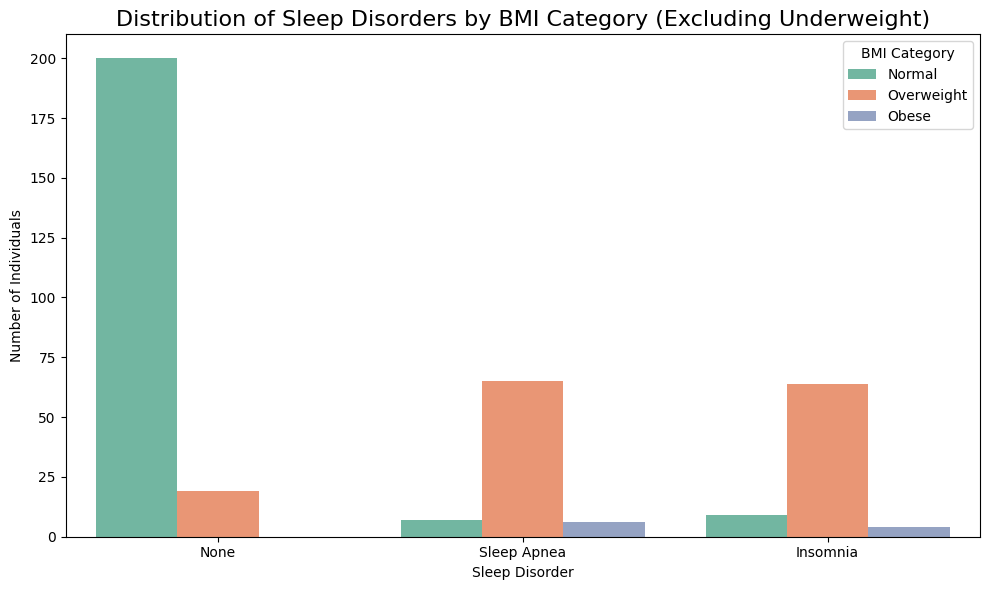

In [23]:
filtered_df = df[df['BMI Category'].isin(['Normal', 'Overweight', 'Obese'])]

bmi_order = ['Normal', 'Overweight', 'Obese']

plt.figure(figsize=(10,6))
sb.countplot(data=filtered_df, x='Sleep Disorder', hue='BMI Category', hue_order=bmi_order, palette='Set2')

plt.title('Distribution of Sleep Disorders by BMI Category (Excluding Underweight)', fontsize=16)
plt.xlabel('Sleep Disorder')
plt.ylabel('Number of Individuals')
plt.legend(title='BMI Category')
plt.tight_layout()
plt.show()

##### Individuals with a normal BMI are significantly less likely to suffer from sleep disorders compared to those who are overweight or obese.

_______________________________________________________________________________________________________________________________________________________

#### Do heart rate and blood pressure affect sleep quality?

In [24]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')

heart_rate_sleep_corr = df[['Heart Rate', 'Quality of Sleep']].corr().iloc[0, 1]

systolic_sleep_corr = df[['Systolic', 'Quality of Sleep']].corr().iloc[0, 1]

correlation_results = pd.DataFrame({
    'Heart Rate': [heart_rate_sleep_corr],
    'Systolic BP': [systolic_sleep_corr]
}, index=['Quality of Sleep'])
print(correlation_results)

                  Heart Rate  Systolic BP
Quality of Sleep   -0.659865    -0.121632


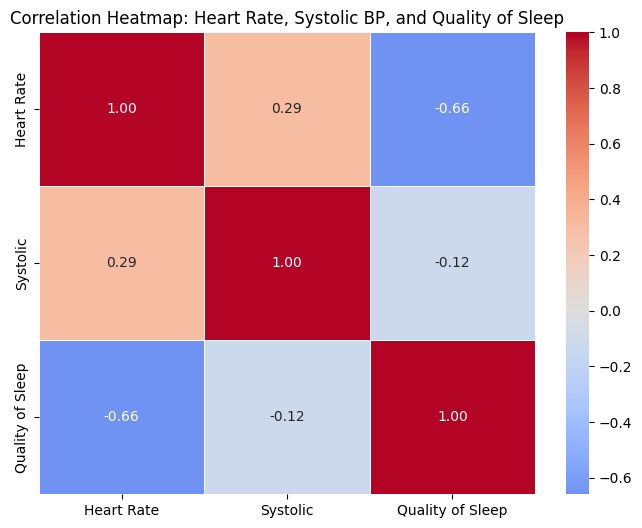

In [25]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')

corr_matrix = df[['Heart Rate', 'Systolic', 'Quality of Sleep']].corr()

plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap: Heart Rate, Systolic BP, and Quality of Sleep')
plt.show()

##### There is a strong negative correlation between heart rate and sleep quality, meaning higher heart rate leads to lower sleep quality. The negative correlation between systolic blood pressure and sleep quality is weak, meaning there is no significant relationship between systolic blood pressure and sleep quality.

_______________________________________________________________________________________________________________________________________________________

### Are there differences between males and females in sleep quality or sleep disorder frequency?

In [26]:
sleep_by_gender = df.groupby('Gender')['Quality of Sleep'].mean()
print(sleep_by_gender)

Gender
Female    7.664865
Male      6.968254
Name: Quality of Sleep, dtype: float64


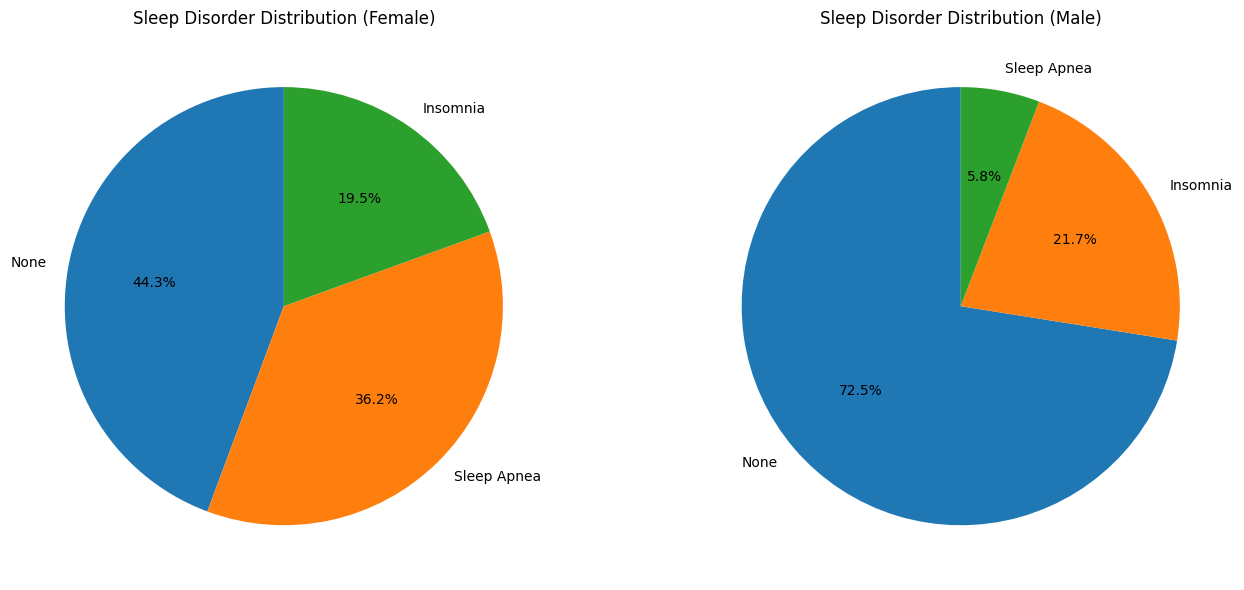

In [27]:
df_female = df[df['Gender'] == 'Female']
df_male = df[df['Gender'] == 'Male']

sleep_disorder_female = df_female['Sleep Disorder'].value_counts()

sleep_disorder_male = df_male['Sleep Disorder'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(sleep_disorder_female, labels=sleep_disorder_female.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Sleep Disorder Distribution (Female)')

axes[1].pie(sleep_disorder_male, labels=sleep_disorder_male.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Sleep Disorder Distribution (Male)')

plt.tight_layout()
plt.show()

##### There is a small difference in sleep quality between males and females, with females showing a slightly higher average. In addition, the distribution of sleep disorders is different: more females report no sleep disorder, while more males experience insomnia or sleep apnea.


_______________________________________________________________________________________________________________________________________________________

### Summary and Conclusions

- There is a strong positive relationship between sleep duration and sleep quality: longer sleep is associated with better quality.
- Higher stress levels are linked to lower sleep quality.
- People with higher physical activity levels tend to experience fewer sleep disorders.
- Individuals with a normal BMI are less likely to suffer from sleep disorders compared to those who are overweight or obese.
- Heart rate has a negative correlation with sleep quality, while systolic blood pressure shows a weak correlation.
- Females generally have slightly higher sleep quality compared to males, and the distribution of sleep disorders varies between genders.

#### Business/Research Recommendations

- Encouraging healthy sleep duration and stress management can help improve sleep quality.
- Promoting physical activity may reduce sleep disorders in the population.
- Monitoring BMI and promoting healthy weight could contribute to better sleep health.
- Further research can explore additional factors that influence sleep health, such as diet or mental health.
